<a href="https://colab.research.google.com/github/Ionicburn/adsp-mit/blob/main/RobertKellogg_CapstonePrjDeepLearningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Malaria Detection
## Context
Malaria is a contagious disease caused by Plasmodium parasites that are transmitted to humans
through the bites of infected female Anopheles mosquitoes. The parasites enter the blood and begin
damaging red blood cells (RBCs) that carry oxygen, which can result in respiratory distress and other
complications. The lethal parasites can stay alive for more than a year in a person’s body without
showing any symptoms. Therefore, late treatment can cause complications and could even be fatal.
Almost 50% of the world’s population is in danger from malaria. There were more than 229 million
malaria cases and 400,000 malaria-related deaths reported over the world in 2019. Children under 5
years of age are the most vulnerable population group affected by malaria; in 2019 they accounted
for 67% of all malaria deaths worldwide.
Traditional diagnosis of malaria in the laboratory requires careful inspection by an experienced
professional to discriminate between healthy and infected red blood cells. It is a tedious,
time-consuming process, and the diagnostic accuracy (which heavily depends on human expertise)
can be adversely impacted by inter-observer variability.
An automated system can help with the early and accurate detection of malaria. Applications of
automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) have
consistently shown higher accuracy than manual classification. It would therefore be highly beneficial
to propose a method that performs malaria detection using Deep Learning Algorithms.


## Objective
Build an efficient computer vision model to detect malaria. The model should identify whether the
image of a red blood cell is that of one infected with malaria or not, and classify the same as
parasitized or uninfected, respectively.
## About the dataset
There are a total of 24,958 train and 2,600 test images (colored) with an equal number of parasitized
and uninfected instances, where:
● The parasitized cells contain the Plasmodium parasite
● The uninfected cells are free of the Plasmodium parasites but could contain other impurities
Note:
1. The images in the dataset are not of equal sizes. We will resize the images to 224x224, which
is the standard input image size of the majority of pre-trained CNN models.
2. These images require some preprocessing before they can be used in Google Colab. The
code for the same is given below.



In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Code to load the data in Google Colab


In [1]:
#Importing libraries required to load the data

import zipfile

import os

from PIL import Image

import numpy as np

In [2]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [4]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [6]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Import Library Files

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

In [8]:
len(train_images), len(test_images)

(24958, 2600)

In [9]:
len(train_labels), len(test_labels)

(24958, 2600)

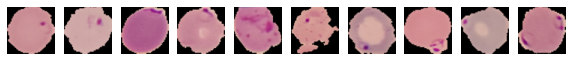

label for each of the above image: [1 1 1 1 1 1 1 1 1 1]


In [10]:
# visualizing the first 10 images in the train dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], cmap="gray") 
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (train_labels[0:10]))

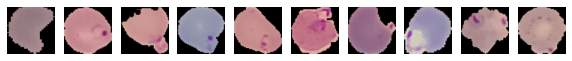

label for each of the above image: [1 1 1 1 1 1 1 1 1 1]


In [11]:
# visualizing the first 10 images in the test dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (test_labels[0:10]))

In [12]:
# Check the split of 0 and 1 in train_labels 
a = train_labels
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 12479, 1: 12479}

In [13]:
# Check the split of 0 and 1 in train_labels 
a = test_labels
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 1300, 1: 1300}

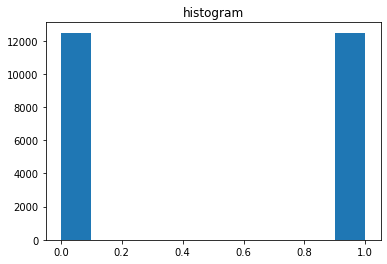

In [14]:
a = train_labels
plt.hist(a) 
plt.title("histogram") 
plt.show()

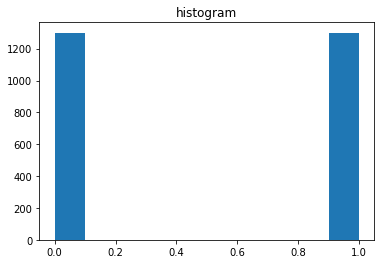

In [15]:
a = test_labels
plt.hist(a) 
plt.title("histogram") 
plt.show()

#Data Preparation

In [16]:
# Shape of the images and the first image

print("Shape:", train_images[0].shape)
print()
print("First image:\n", train_images[0])

Shape: (64, 64, 3)

First image:
 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [17]:
train_copy = train_images
test_copy = test_images

In [18]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

train_copy = train_copy.reshape(train_copy.shape[0], 64,64,3)
test_copy = test_copy.reshape(test_copy.shape[0], 64,64,3)

In [19]:
# Normalize inputs from 0-255 to 0-1

train_copy= train_copy / 255.0
test_copy = test_copy / 255.0

In [20]:
# New shape 

print('Training set:', train_copy.shape, train_labels.shape)
print('Test set:', test_copy.shape, test_labels.shape)

Training set: (24958, 64, 64, 3) (24958,)
Test set: (2600, 64, 64, 3) (2600,)


In [21]:
#Write the function and appropriate variable name to one-hot encode the output

train_labels_ohe = tf.keras.utils.to_categorical(train_labels)
test_labels_ohe = tf.keras.utils.to_categorical(test_labels)

#test labels
test_labels_ohe

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Model Building

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 16, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

In [22]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [23]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [24]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape = (64,64,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(2, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer= adam, metrics =['accuracy'])
    
    return model

In [25]:
#Build the model
model_1 = cnn_model_1()

In [26]:
#Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

In [27]:

# Fit the model
history_model_1 = model_1.fit(train_copy, train_labels_ohe, validation_split=0.2, batch_size=16, verbose=1, epochs=10)

Epoch 1/10
1248/1248 [==============================] - 23s 18ms/step - loss: 0.4497 - accuracy: 0.7893 - val_loss: 0.3934 - val_accuracy: 0.9509
Epoch 2/10
1248/1248 [==============================] - 22s 18ms/step - loss: 0.2351 - accuracy: 0.9146 - val_loss: 0.2885 - val_accuracy: 0.9255
Epoch 3/10
1248/1248 [==============================] - 22s 18ms/step - loss: 0.1953 - accuracy: 0.9277 - val_loss: 0.1457 - val_accuracy: 0.9716
Epoch 4/10
1248/1248 [==============================] - 22s 18ms/step - loss: 0.1751 - accuracy: 0.9360 - val_loss: 0.2865 - val_accuracy: 0.9181
Epoch 5/10
1248/1248 [==============================] - 22s 18ms/step - loss: 0.1382 - accuracy: 0.9517 - val_loss: 0.3188 - val_accuracy: 0.9203
Epoch 6/10
1248/1248 [==============================] - 23s 18ms/step - loss: 0.1220 - accuracy: 0.9580 - val_loss: 0.2162 - val_accuracy: 0.9377
Epoch 7/10
1248/1248 [==============================] - 22s 18ms/step - loss: 0.1062 - accuracy: 0.9634 - val_loss: 0.4619 -

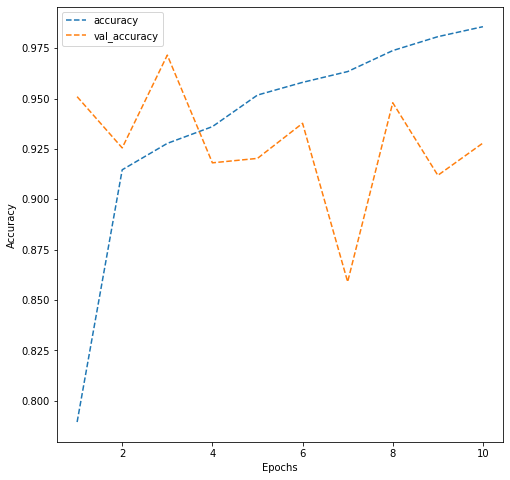

In [28]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,11)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [35]:
#Make prediction on the test data using model_2 
test_pred = model_1.predict(test_copy)

test_pred = np.argmax(test_pred, axis=-1)

In [36]:
#Converting each entry to single label from one-hot encoded vector
test_pred_label = np.argmax(test_labels_ohe, axis=-1)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1300
           1       0.92      0.92      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.92      2600
weighted avg       0.92      0.92      0.92      2600



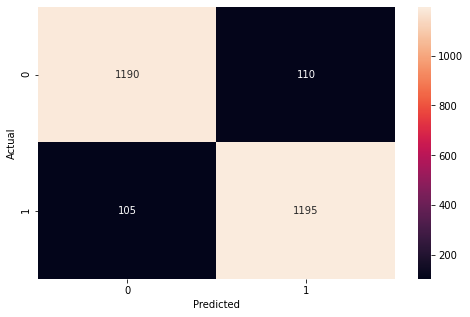

In [37]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(test_pred_label, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(test_pred_label, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [30]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 15 epochs**. Store the model building history to use later for visualization.

In [31]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape = (64,64,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer= adam, metrics =['accuracy'])
    
    return model

In [32]:
#Build the model
model_2 = cnn_model_2()

In [33]:
#Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9

In [34]:
# Fit the model
history_model_2 = model_2.fit(train_copy, train_labels_ohe, validation_split=0.2, batch_size=32, verbose=1, epochs=15)

Epoch 1/15
624/624 [==============================] - 43s 68ms/step - loss: 0.6374 - accuracy: 0.7459 - val_loss: 0.0865 - val_accuracy: 0.9856
Epoch 2/15
624/624 [==============================] - 43s 69ms/step - loss: 0.1953 - accuracy: 0.9312 - val_loss: 0.1623 - val_accuracy: 0.9714
Epoch 3/15
624/624 [==============================] - 42s 68ms/step - loss: 0.1594 - accuracy: 0.9454 - val_loss: 0.0855 - val_accuracy: 0.9834
Epoch 4/15
624/624 [==============================] - 43s 69ms/step - loss: 0.1467 - accuracy: 0.9502 - val_loss: 0.1402 - val_accuracy: 0.9766
Epoch 5/15
624/624 [==============================] - 44s 70ms/step - loss: 0.1359 - accuracy: 0.9532 - val_loss: 0.0486 - val_accuracy: 0.9906
Epoch 6/15
624/624 [==============================] - 43s 69ms/step - loss: 0.1308 - accuracy: 0.9531 - val_loss: 0.2339 - val_accuracy: 0.9712
Epoch 7/15
624/624 [==============================] - 43s 69ms/step - loss: 0.1234 - accuracy: 0.9554 - val_loss: 0.2753 - val_accuracy:

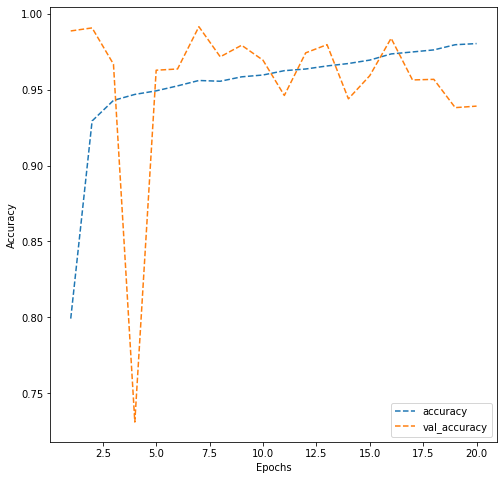

In [ ]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [38]:
#Make prediction on the test data using model_2 
test_pred = model_2.predict(test_copy)

test_pred = np.argmax(test_pred, axis=-1)

In [39]:
#Converting each entry to single label from one-hot encoded vector
test_pred_label = np.argmax(test_labels_ohe, axis=-1)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1300
           1       0.98      0.90      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



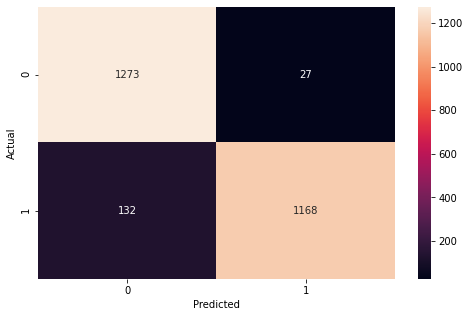

In [40]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(test_pred_label, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(test_pred_label, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()